In [45]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Наложение и удаление шума

In [46]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

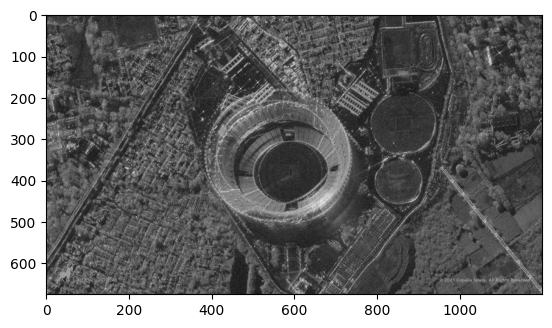

In [47]:
plt.imshow(image_gray, cmap="gray")

In [48]:
# Gaussian noise
mean = 0
stddev = 100
noise_gauss = np.zeros(image_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,   0, 150, ...,  50,   0,  12],
       [149,   0,   0, ...,   0,   0,   0],
       [  0, 196,  83, ...,   0,   0,   0],
       ...,
       [  0,  75,   0, ...,   0,   0,  96],
       [ 51, 137,   0, ...,  30,  43,   0],
       [  0,  96,   0, ...,   0,   0, 136]],
      shape=(675, 1200), dtype=uint8)

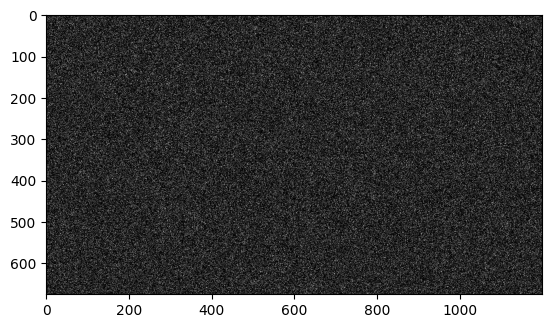

In [49]:
plt.imshow(noise_gauss, cmap="gray")

In [50]:
# Salt and pepper
noise =  np.random.randint(0, 101, size = (image_gray.shape[0], image_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise == 0)
ones_pixel = np.where(noise == 100)

In [51]:
bg_image = np.ones(image_gray.shape, np.uint8) * 128

In [52]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

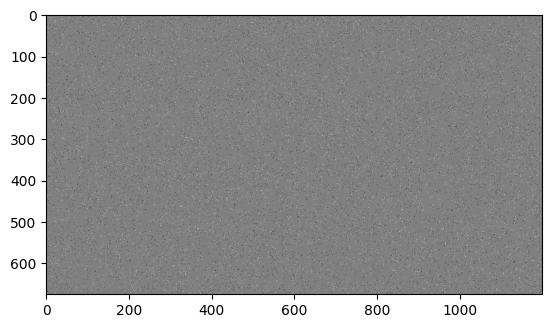

In [53]:
plt.imshow(bg_image, cmap="gray")

In [54]:
image_noise_gauss = cv2.add(image_gray,noise_gauss)

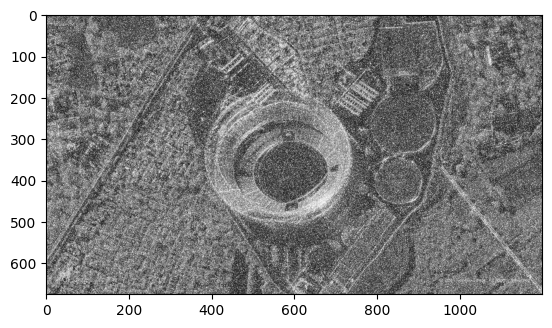

In [55]:
plt.imshow(image_noise_gauss, cmap="gray")

In [56]:
from skimage.metrics import structural_similarity, mean_squared_error
mse_gauss = mean_squared_error(image_gray, image_noise_gauss)
(ssim, diff) = structural_similarity(image_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim)

4226.239728395061 0.18743451852156143


In [57]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [58]:
mse_gauss_median = mean_squared_error(image_gray, image_gauss_median)
(ssim_gauss_median, diff) = structural_similarity(image_gray,  image_gauss_median, full=True)

In [59]:
print(mse_gauss_median, ssim_gauss_median)

1030.8291802469137 0.4307187977842213


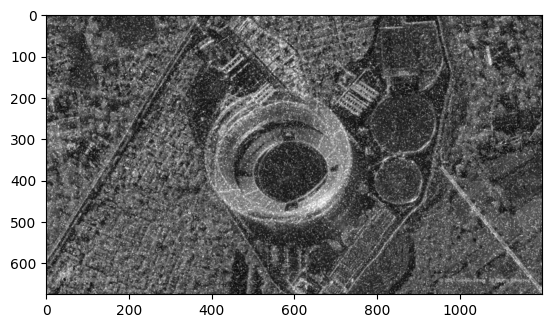

In [60]:
plt.imshow(image_gauss_median, cmap="gray")

In [61]:
import copy

image_sp = copy.deepcopy(image_gray)

image_sp[zeros_pixel] = 0
image_sp[ones_pixel] = 255

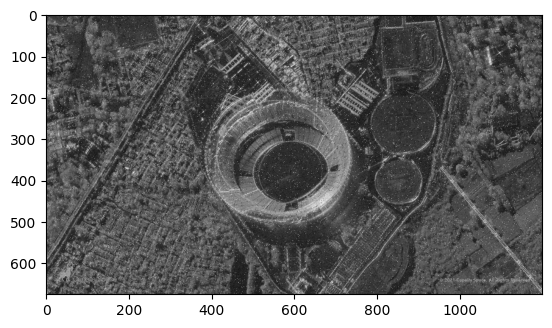

In [62]:
plt.imshow(image_sp, cmap="gray")

In [63]:
mse_sp = mean_squared_error(image_gray, image_sp)
(ssim_sp, diff) = structural_similarity(image_gray, image_sp, full=True)
print(mse_sp, ssim_sp)

388.44194567901235 0.7218251047146524


In [64]:
image_sp_median = cv2.medianBlur(image_sp, 3)

In [65]:
mse_sp_median = mean_squared_error(image_gray, image_sp_median)
(ssim_sp_median, diff) = structural_similarity(image_gray, image_sp_median, full=True)
print(mse_sp_median, ssim_sp_median)

95.88190740740741 0.8161070162934112


# Другие типы фильтров

In [66]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [67]:
image_gauss_bilat = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [68]:
image_gauss_nlm = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [69]:
import math

def geom(a):
    prod = 1
    for i in range(a.shape[0]):
        prod1 = 1
        for j in range(a.shape[1]):
            prod1 *= a[i,j]
        prod1 = math.pow(prod1, 1.0/9.0)
        prod *= prod1
    return prod

def proc(img, filter):
    img_res = copy.deepcopy(img)
    for i in range(0,img.shape[0] -2):
        for j in range(0,img.shape[1] -2):
            img_res[i:i+3, j:j+3] = filter(img[i:i+3, j:j+3])
    return img_res
    
res = proc(image_noise_gauss, geom)


C:\Users\savel\AppData\Local\Temp\ipykernel_13412\164976186.py:8: RuntimeWarning: overflow encountered in scalar multiply
  prod1 *= a[i,j]


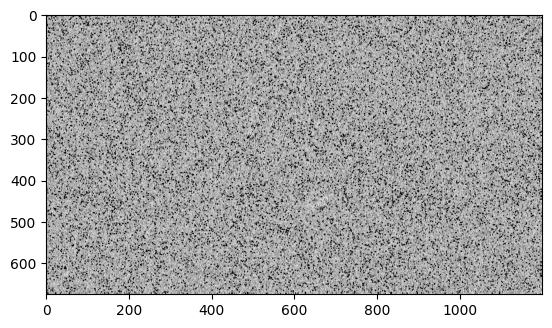

In [70]:
plt.imshow(res, cmap="gray")

In [71]:
mse_geom = mean_squared_error(image_gray, res)
(ssim_geom, diff) = structural_similarity(image_gray, res, full=True)
print(mse_geom, ssim_geom)

6550.92344691358 0.02747492964585714



# 2D свертка

In [72]:
# averaging filter
kernel_5 = np.ones((5,5),np.float32)/25
image_k5 = cv2.filter2D(image_gray,-1,kernel_5)
# blured_image = cv2.blur(img,(5,5))
image_b5 = cv2.blur(image_gray,(5,5))

In [73]:
mse_kb = mean_squared_error(image_k5, image_b5)
(ssim_kb, diff) = structural_similarity(image_k5, image_b5, full=True)
print(mse_kb, ssim_kb)

0.0 1.0


In [74]:
# Laplasian
kernel_lapl = np.array([[0,-10,0],
                        [-10,40,-10],
                        [0,-10,0]], np.float32)

In [75]:
image_lapl = cv2.filter2D(image_gray,-1,kernel_lapl) 

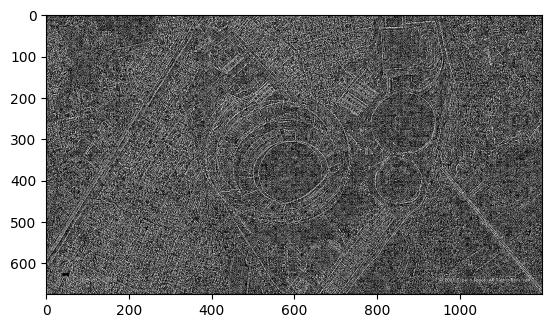

In [76]:
plt.imshow(image_lapl, cmap="gray")

## Домашнее задание

In [77]:
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

### 1. Добавляем шум на картинку при помощи шума гаусса и постоянного шума

In [78]:
image2 = cv2.imread('img.jpg')
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY) 

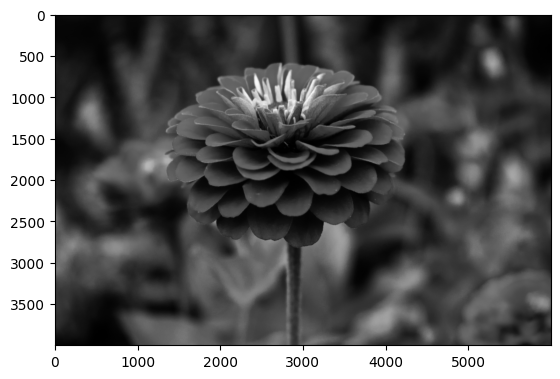

In [79]:
plt.imshow(image2_gray, cmap="gray")

In [80]:
mean = 0
stddev = 150
noise_gauss = np.zeros(image2_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stddev)

array([[  0,   0,   0, ...,   0, 131, 126],
       [  0,   0,   0, ...,   0, 124, 120],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 144, ..., 255,   0, 115],
       [119,   0,  80, ..., 110, 113,   0],
       [ 89, 255,   0, ..., 155,   0,   0]],
      shape=(4000, 6000), dtype=uint8)

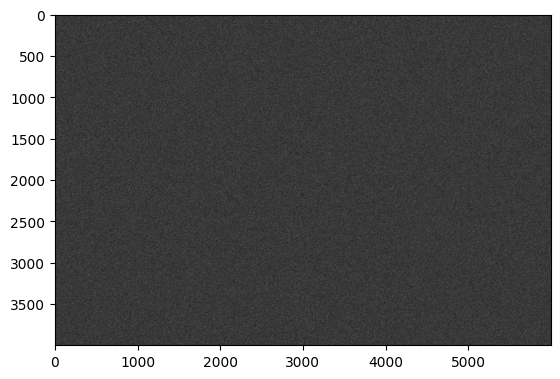

In [81]:
plt.imshow(noise_gauss, cmap="gray")

In [82]:
image2_noise_gauss = cv2.add(image2_gray,noise_gauss)

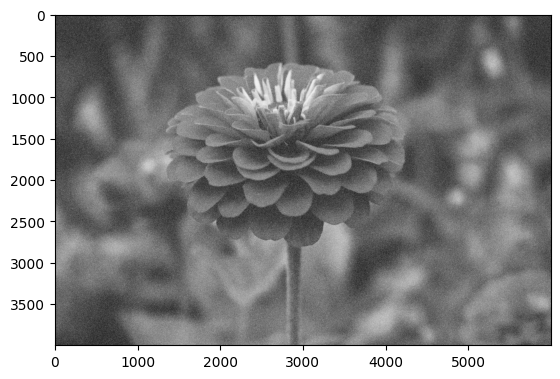

In [83]:
plt.imshow(image2_noise_gauss, cmap="gray")

In [84]:
permanent_noise = np.zeros(image2_gray.shape, np.int16)
cv2.randu(permanent_noise, 50, 50) 

array([[50, 50, 50, ..., 50, 50, 50],
       [50, 50, 50, ..., 50, 50, 50],
       [50, 50, 50, ..., 50, 50, 50],
       ...,
       [50, 50, 50, ..., 50, 50, 50],
       [50, 50, 50, ..., 50, 50, 50],
       [50, 50, 50, ..., 50, 50, 50]], shape=(4000, 6000), dtype=int16)

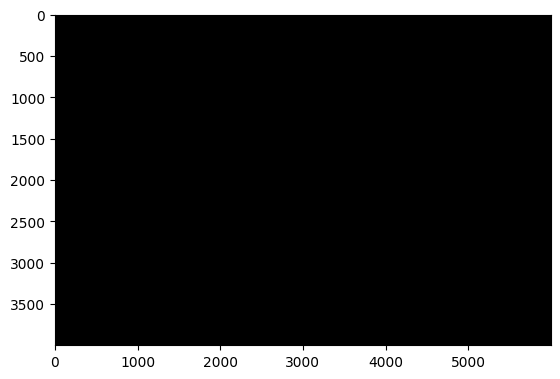

In [85]:
plt.imshow(permanent_noise, cmap="gray")

In [86]:
image2_const_noisy = cv2.add(image2_gray.astype(np.int16), permanent_noise)
image2_const_noisy = np.clip(image2_const_noisy, 0, 255).astype(np.uint8)

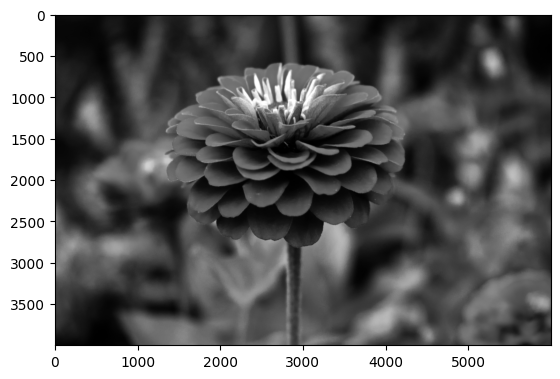

In [87]:
plt.imshow(image2_const_noisy, cmap="gray")

### 2. Тестируем фильтры: медианный, Гаусса, билатериальный, нелокальных средних с различными параметрами


Гауссовский шум
median    · MSE: 1864.81, SSIM: 0.0776
gauss     · MSE: 3223.03, SSIM: 0.1398
bilateral · MSE: 4362.03, SSIM: 0.0388
nlm       · MSE: 7778.47, SSIM: 0.0162
gauss (SSIM: 0.1398)


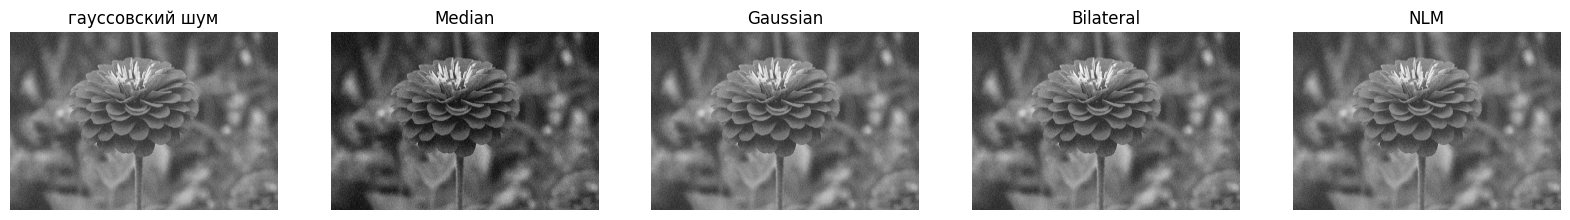


Постоянный шум
median    · MSE: 2499.03, SSIM: 0.6668
gauss     · MSE: 2505.80, SSIM: 0.6700
bilateral · MSE: 2510.66, SSIM: 0.6206
nlm       · MSE: 2509.94, SSIM: 0.6184
gauss (SSIM: 0.6700)


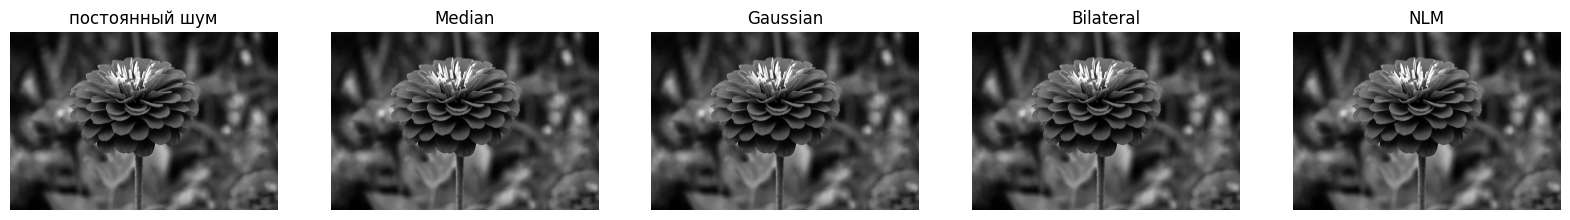

In [88]:
def test_filters(noisy, name):
    results = {}

    median = cv2.medianBlur(noisy, 3)
    results["median"] = (median, mean_squared_error(image2_gray, median),
                         structural_similarity(image2_gray, median))

    gauss = cv2.GaussianBlur(noisy, (5,5), 1)
    results["gauss"] = (gauss, mean_squared_error(image2_gray, gauss),
                        structural_similarity(image2_gray, gauss))

    bilateral = cv2.bilateralFilter(noisy, 9, 75, 75)
    results["bilateral"] = (bilateral, mean_squared_error(image2_gray, bilateral),
                            structural_similarity(image2_gray, bilateral))

    nlm = cv2.fastNlMeansDenoising(noisy, h=15)
    results["nlm"] = (nlm, mean_squared_error(image2_gray, nlm),
                      structural_similarity(image2_gray, nlm))

    print(f"\n{name.capitalize()} шум")
    best = None
    for k, (_, mse, ssim) in results.items():
        print(f"{k:9s} · MSE: {mse:.2f}, SSIM: {ssim:.4f}")
        if best is None or ssim > best[2]:
            best = (k, mse, ssim)

    print(f"{best[0]} (SSIM: {best[2]:.4f})")

    _, axs = plt.subplots(1, 5, figsize=(20,15))
    axs[0].imshow(noisy, cmap="gray"); axs[0].set_title(f"{name} шум")
    axs[1].imshow(results["median"][0], cmap="gray"); axs[1].set_title("Median")
    axs[2].imshow(results["gauss"][0], cmap="gray"); axs[2].set_title("Gaussian")
    axs[3].imshow(results["bilateral"][0], cmap="gray"); axs[3].set_title("Bilateral")
    axs[4].imshow(results["nlm"][0], cmap="gray"); axs[4].set_title("NLM")
    for ax in axs: ax.axis("off")
    plt.show()


test_filters(image2_noise_gauss, "гауссовский")
test_filters(image2_const_noisy, "постоянный")

### 3. Выясняем, какой фильтр показал лучший результат фильтрации

Гауссовский фильтр показал лучший результат. При нём достигается лучший SSIM при сравнимом MSE.